In [107]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score,precision_score ,recall_score, f1_score, classification_report, confusion_matrix, plot_confusion_matrix, plot_roc_curve
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.inspection import permutation_importance
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import datasets
import numpy as np
from sklearn.svm import SVC


In [101]:
import pandas as pd

In [3]:
def loading_csv():
    return pd.read_csv(r"D:\Mateo Leon\Desktop\Tesis\SPAM\Preprocesamiento\procesamiento.csv", delimiter=",", na_values="n/a")

In [4]:
data = loading_csv()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1158 entries, 0 to 1157
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   has_uppercase_word        1158 non-null   int64
 1   Number_of_!_subject       1158 non-null   int64
 2   number_of_!_text          1158 non-null   int64
 3   number_of_clicks_text     1158 non-null   int64
 4   text_has_external_url     1158 non-null   int64
 5   number_of_free_subject    1158 non-null   int64
 6   number_of_free_text       1158 non-null   int64
 7   number_of_free            1158 non-null   int64
 8   contains_html_data        1158 non-null   int64
 9   dictionary_count_text     1158 non-null   int64
 10  dictionary_count_subject  1158 non-null   int64
 11  tipo                      1158 non-null   int64
dtypes: int64(12)
memory usage: 108.6 KB


In [5]:
from pandas_profiling import ProfileReport

In [6]:
ProfileReport(loading_csv())


In [7]:
features = data.columns[0:11]
x = data[features]

In [8]:
labels = data.columns[11:]
y = data[labels].values.ravel()

In [9]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

In [10]:
clf_GNB = GaussianNB()
clf_GNB.fit(x_train, y_train)

GaussianNB()

In [11]:
y_pred_GNB = clf_GNB.predict(x_test)
y_pred_GNB

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1], dtype=int64)

In [87]:
accuracy_GNB = accuracy_score(y_test, y_pred_GNB)
precision_GNB = precision_score(y_test, y_pred_GNB)
recall_GNB = recall_score(y_test, y_pred_GNB)
f1_GNB = f1_score(y_test, y_pred_GNB)
visualizer_GNB = classification_report(y_test, y_pred_GNB, target_names=["ham", "spam"])
print(visualizer_GNB)

              precision    recall  f1-score   support

         ham       0.68      0.09      0.16       142
        spam       0.52      0.96      0.68       148

    accuracy                           0.53       290
   macro avg       0.60      0.53      0.42       290
weighted avg       0.60      0.53      0.42       290



In [86]:
clfLR = LogisticRegression(random_state=0).fit(x_train,y_train)
y_pred_lr = clfLR.predict(x_test)
visualizer_lr = classification_report(y_test, y_pred_lr, target_names=["ham", "spam"])
print(visualizer_lr)

              precision    recall  f1-score   support

         ham       0.49      0.59      0.54       142
        spam       0.51      0.41      0.46       148

    accuracy                           0.50       290
   macro avg       0.50      0.50      0.50       290
weighted avg       0.50      0.50      0.50       290



In [18]:
clfRF = RandomForestClassifier(n_estimators=100)
clfRF.fit(x_train,y_train)
y_pred_rf = clfRF.predict(x_test)

In [19]:
feature_imp_RF = pd.Series(clfRF.feature_importances_,index=x_train.columns.values).sort_values(ascending=False)
feature_imp_RF

dictionary_count_text       0.277536
number_of_!_text            0.211280
number_of_clicks_text       0.104047
dictionary_count_subject    0.092127
Number_of_!_subject         0.074843
number_of_free              0.052409
has_uppercase_word          0.050728
number_of_free_text         0.050293
text_has_external_url       0.038865
contains_html_data          0.032774
number_of_free_subject      0.015098
dtype: float64

In [76]:
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)
visualizer_rf = classification_report(y_test, y_pred_rf, target_names=["ham", "spam"])
print(visualizer_rf)

              precision    recall  f1-score   support

         ham       0.48      0.49      0.48       142
        spam       0.50      0.49      0.50       148

    accuracy                           0.49       290
   macro avg       0.49      0.49      0.49       290
weighted avg       0.49      0.49      0.49       290



In [24]:
clf_SGD = SGDClassifier(loss='modified_huber',shuffle=True,random_state=101)
clf_SGD.fit(x_train, y_train)
y_pred_SGD = clf_SGD.predict(x_test)

In [39]:
clf_SGD.score(x_test, y_test)
f1_SGD = f1_score(y_test, y_pred_SGD)

In [37]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train,y_train)
yP = knn.predict(x_test)

In [75]:
f1_kN = f1_score(y_test, yP)
recall_KN = recall_score(y_test, yP)
precision_KN = precision_score(y_test, yP)
accuracy_KN = accuracy_score(y_test, yP)
visualizer_kn = classification_report(y_test, yP, target_names=["ham", "spam"])
print(visualizer_kn)

              precision    recall  f1-score   support

         ham       0.43      0.47      0.45       142
        spam       0.44      0.41      0.42       148

    accuracy                           0.44       290
   macro avg       0.44      0.44      0.44       290
weighted avg       0.44      0.44      0.44       290



In [42]:
dtree = DecisionTreeClassifier(max_depth=10,random_state=101,max_features=None,min_samples_leaf=5)
dtree.fit(x_train, y_train)
y_pred_DT = dtree.predict(x_test)

In [74]:
f1_DT = f1_score(y_test, y_pred_DT)
recall_DT = recall_score(y_test, y_pred_DT)
precision_DT = precision_score(y_test, y_pred_DT)
accuracy_DT = accuracy_score(y_test, y_pred_DT)
visualizer_dt = classification_report(y_test, y_pred_DT, target_names=["ham", "spam"])
print(visualizer_dt)

              precision    recall  f1-score   support

         ham       0.46      0.42      0.44       142
        spam       0.49      0.53      0.51       148

    accuracy                           0.48       290
   macro avg       0.47      0.47      0.47       290
weighted avg       0.47      0.48      0.47       290



In [46]:
svm = SVC(gamma='scale', C=1.0, random_state=101)
svm.fit(x_train, y_train)
y_pred_SVM = svm.predict(x_test)

In [88]:
f1_SVM = f1_score(y_test, y_pred_SVM)
recall_SVM = recall_score(y_test, y_pred_SVM)
precision_SVM = precision_score(y_test, y_pred_SVM)
accuracy_SVM = accuracy_score(y_test, y_pred_SVM)

In [71]:
visualizer_svm = classification_report(y_test, y_pred_SVM, target_names=["ham", "spam"])
print(visualizer_svm)

              precision    recall  f1-score   support

         ham       0.48      0.46      0.47       142
        spam       0.50      0.52      0.51       148

    accuracy                           0.49       290
   macro avg       0.49      0.49      0.49       290
weighted avg       0.49      0.49      0.49       290



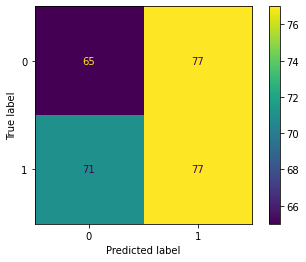

In [95]:
plot_confusion_matrix(svm, x_test, y_test)

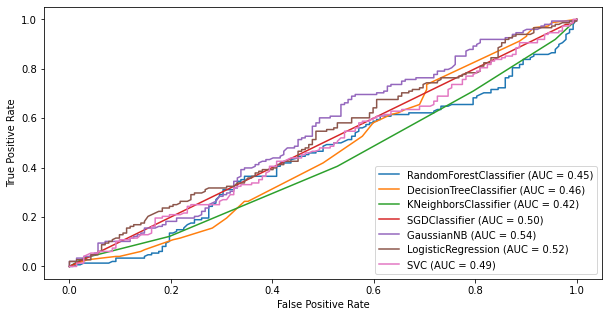

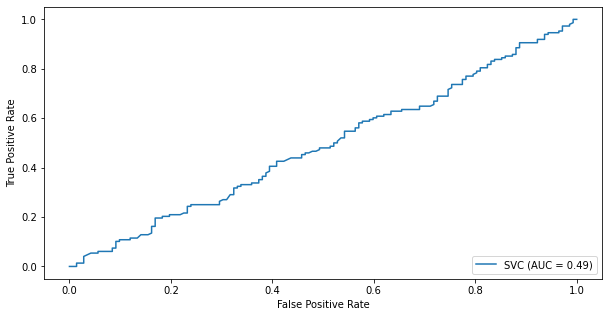

In [128]:
ax = plt.gca()
roc_curve_svm = plot_roc_curve(svm, x_test, y_test)
roc_curve_rf = plot_roc_curve(clfRF, x_test,y_test, ax=ax)
roc_curve_dt = plot_roc_curve(dtree, x_test,y_test, ax=ax)
roc_curve_kn = plot_roc_curve(knn, x_test,y_test, ax=ax)
roc_curve_sgd = plot_roc_curve(clf_SGD, x_test,y_test, ax=ax)
roc_curve_gnb = plot_roc_curve(clf_GNB, x_test,y_test, ax=ax)
roc_curve_lr = plot_roc_curve(clfLR, x_test,y_test, ax=ax)
plt.rcParams['figure.figsize'] = [15, 5]
roc_curve_svm.plot(ax=ax)